## Importing and Cleaning Data

In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Importing Data
df = pd.read_csv('adult.csv', na_values='?')

In [13]:
# Cleaning Data

# Since workclass and occupation are categorical, we can fill them with unknown
df['workclass'] = df['workclass'].fillna('unknown')
df['occupation'] = df['occupation'].fillna('unknown')

df.dropna(inplace=True) #Dropping rows with missing values

for col in df.select_dtypes(include='object'): # Iterates over all the columns which contains non numerical values like string
    df[col] = df[col].str.strip().str.lower() # Removes the extra spaces in the values and convert them into lowercase

numeric_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Ensures value in numeric columns are actually numerical

df.dropna(subset=numeric_cols, inplace=True) # Drops any row that turn NaN during conversion to numeric

df['net.capital'] = df['capital.gain'] - df['capital.loss'] # Creating a derived feature

df.to_csv('cleaned_data.csv', index=False) #Exporting the data to another CSV file

## Graphs and Representations

### Income Based

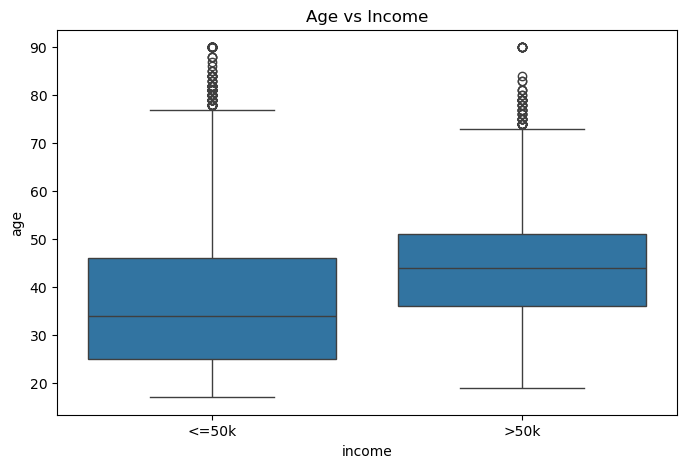

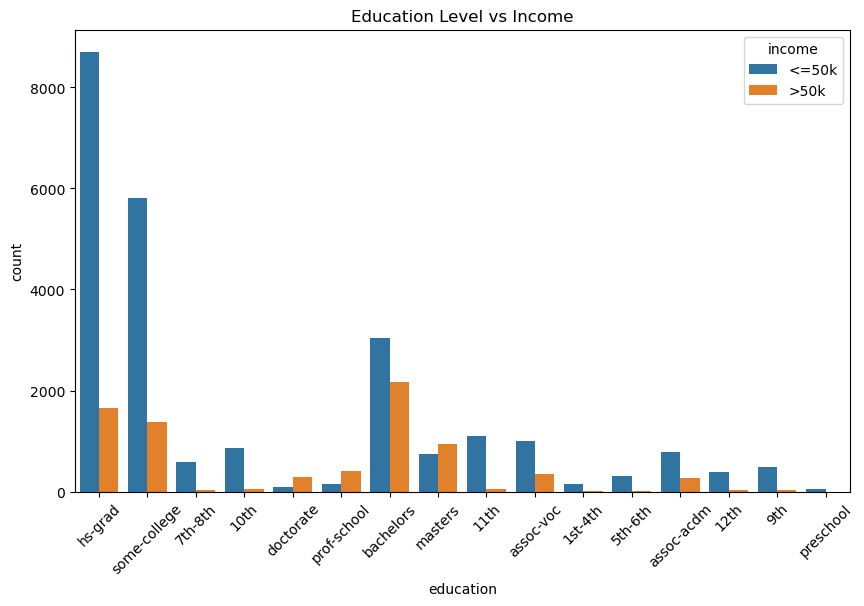

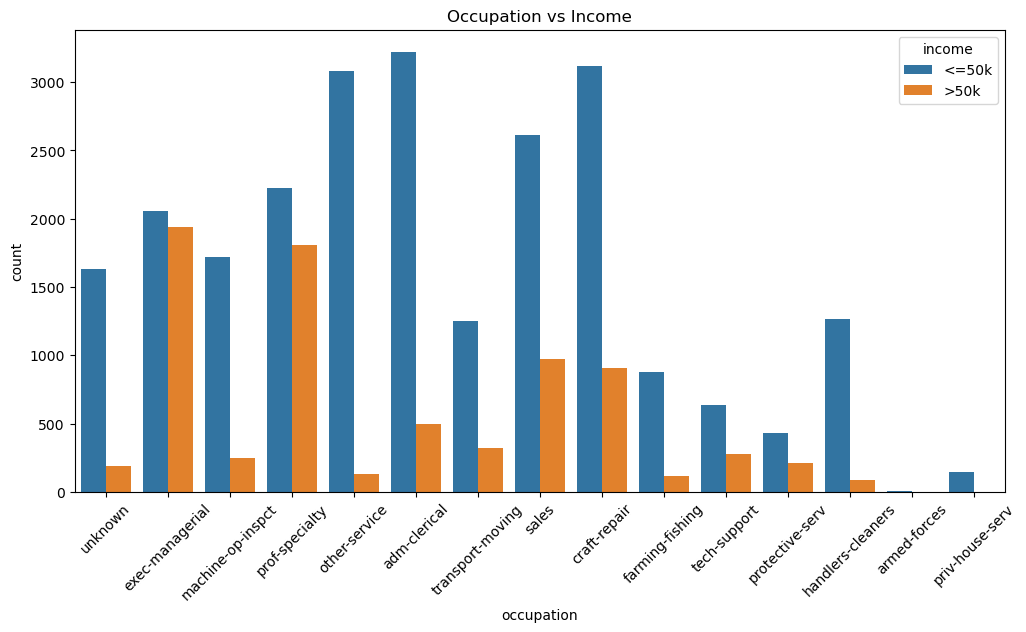

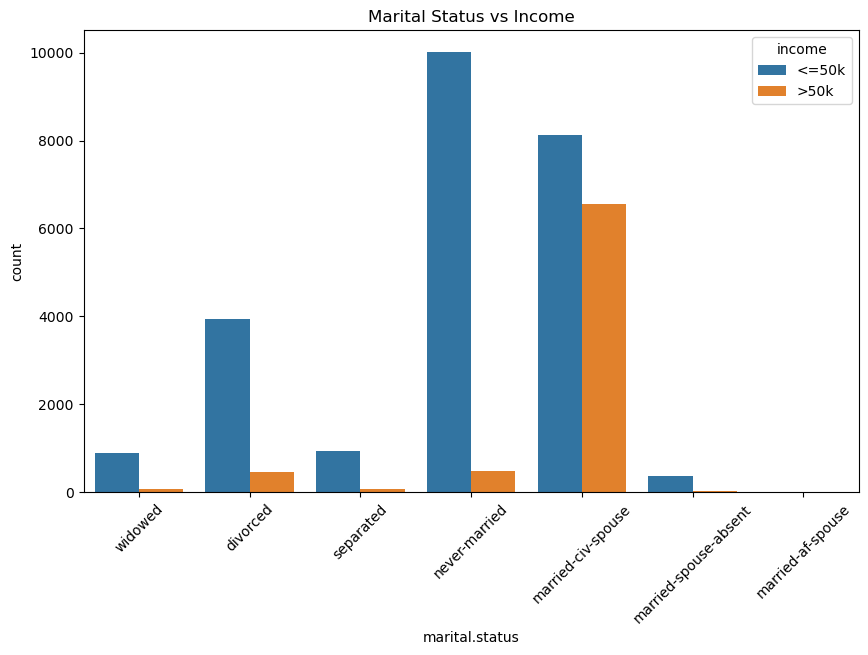

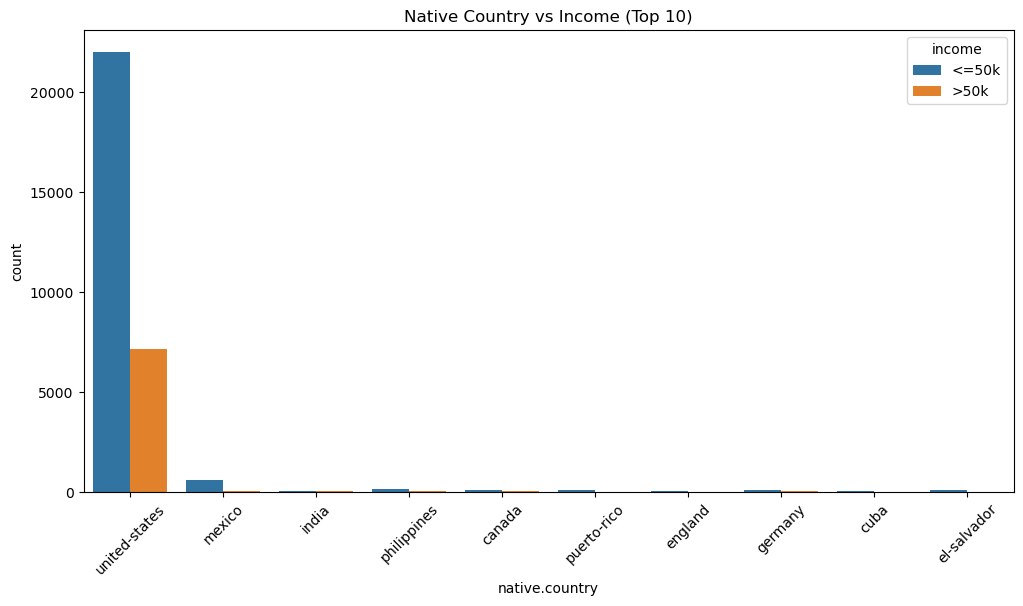

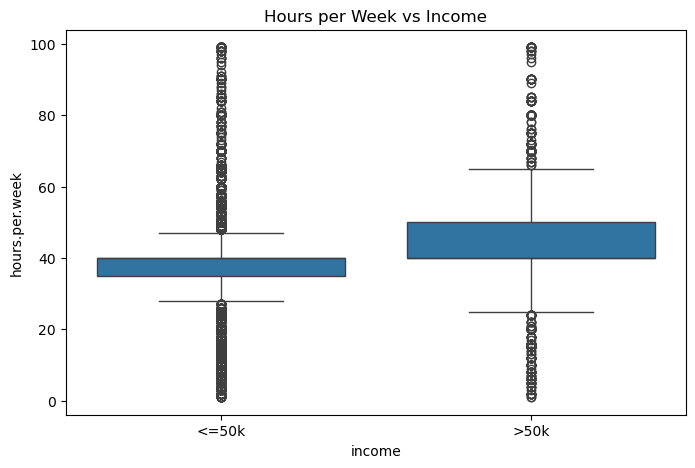

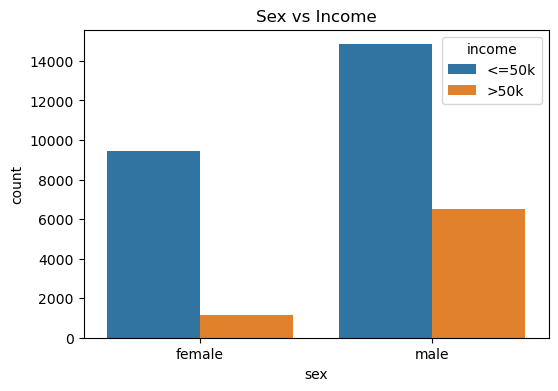

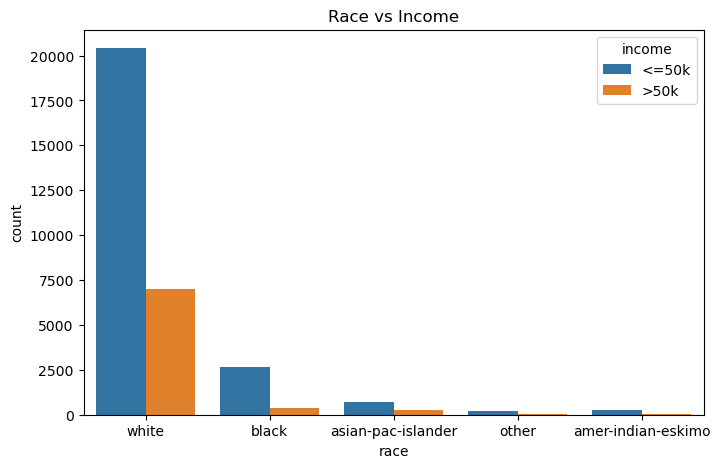

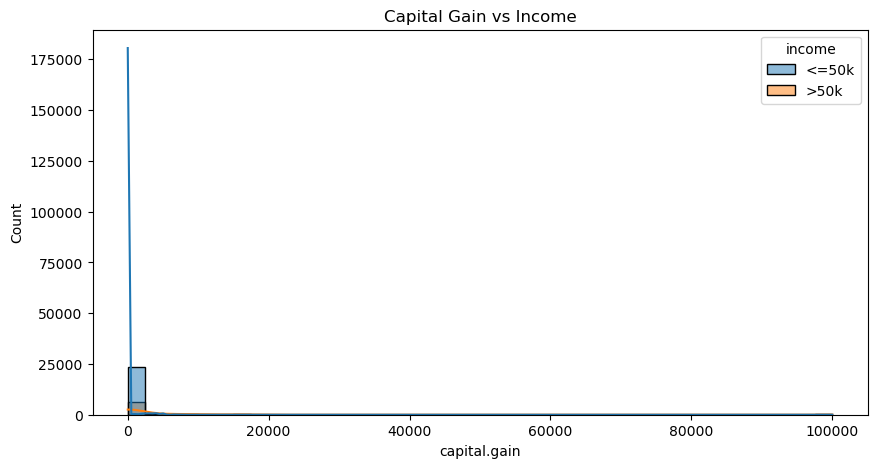

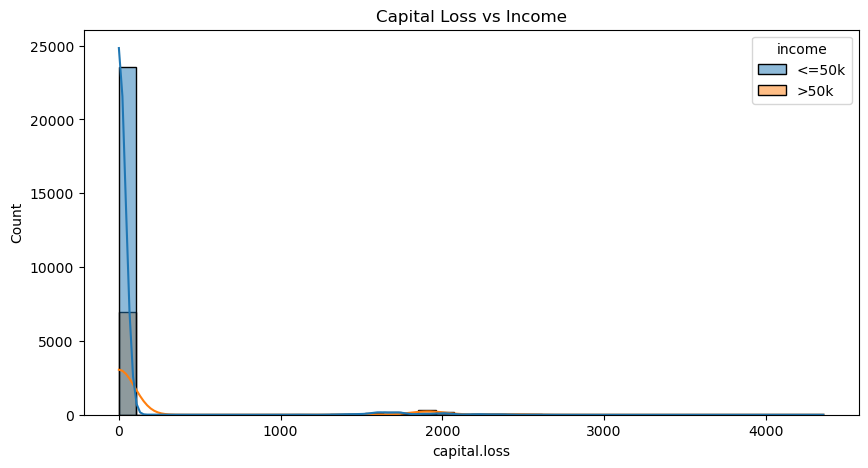

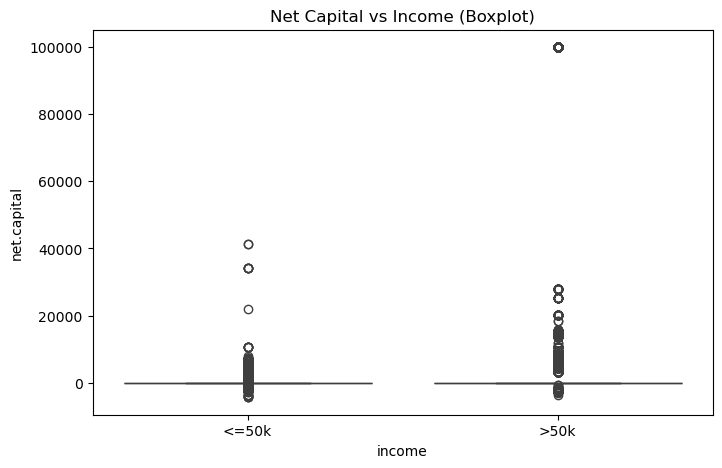

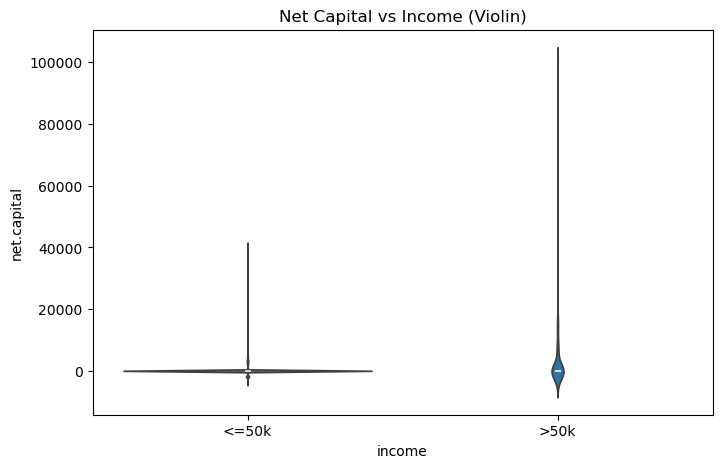

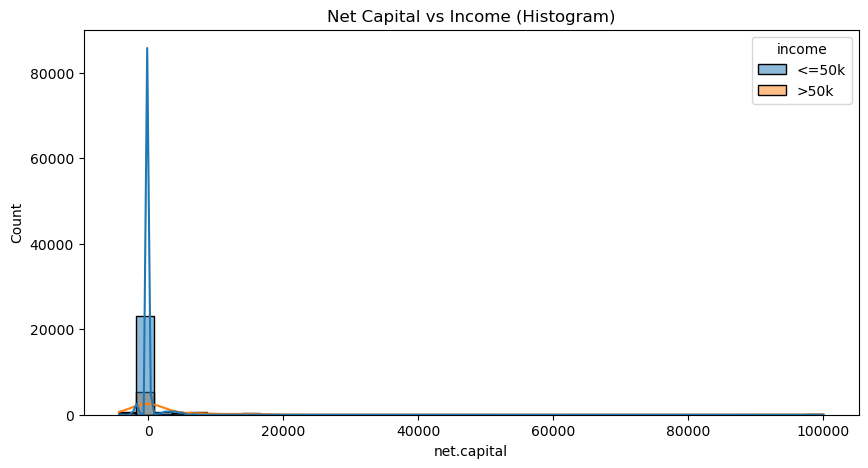

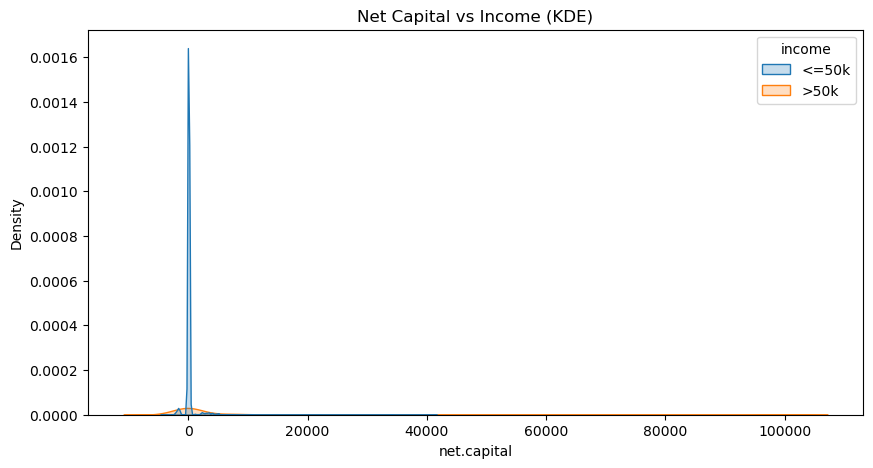

In [14]:
# Age vs Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.savefig("graphs/age_vs_income.png")
plt.show()

# Education Level vs Income
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Education Level vs Income")
plt.savefig("graphs/education_vs_income.png")
plt.show()

# Occupation vs Income
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Occupation vs Income")
plt.savefig("graphs/occupation_vs_income.png")
plt.show()

# Marital Status vs Income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital.status', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Marital Status vs Income")
plt.savefig("graphs/marital_status_vs_income.png")
plt.show()

# Native Country (Top 10) vs Income 
top_countries = df['native.country'].value_counts().nlargest(10).index
df_top = df[df['native.country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(x='native.country', hue='income', data=df_top)
plt.xticks(rotation=45)
plt.title("Native Country vs Income (Top 10)")
plt.savefig("graphs/country_vs_income_top10.png")
plt.show()

# Hours per Week vs Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='hours.per.week', data=df)
plt.title("Hours per Week vs Income")
plt.savefig("graphs/hours_vs_income.png")
plt.show()

# Sex vs Income
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='income', data=df)
plt.title("Sex vs Income")
plt.savefig("graphs/sex_vs_income.png")
plt.show()

# Race vs Income
plt.figure(figsize=(8, 5))
sns.countplot(x='race', hue='income', data=df)
plt.title("Race vs Income")
plt.savefig("graphs/race_vs_income.png")
plt.show()

# Capital Gain vs Income
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='capital.gain', hue='income', bins=40, kde=True)
plt.title("Capital Gain vs Income")
plt.savefig("graphs/capital_gain_vs_income.png")
plt.show()

# Capital Loss vs Income
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='capital.loss', hue='income', bins=40, kde=True)
plt.title("Capital Loss vs Income")
plt.savefig("graphs/capital_loss_vs_income.png")
plt.show()

# Net Capital vs Income (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='net.capital', data=df)
plt.title("Net Capital vs Income (Boxplot)")
plt.savefig("graphs/net_capital_boxplot.png")
plt.show()

# Net Capital vs Income (Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(x='income', y='net.capital', data=df)
plt.title("Net Capital vs Income (Violin)")
plt.savefig("graphs/net_capital_violin.png")
plt.show()

# Net Capital vs Income (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='net.capital', hue='income', bins=40, kde=True)
plt.title("Net Capital vs Income (Histogram)")
plt.savefig("graphs/net_capital_histogram.png")
plt.show()

# Net Capital vs Income (KDE)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='net.capital', hue='income', fill=True)
plt.title("Net Capital vs Income (KDE)")
plt.savefig("graphs/net_capital_kde.png")
plt.show()

### Distribution Plots

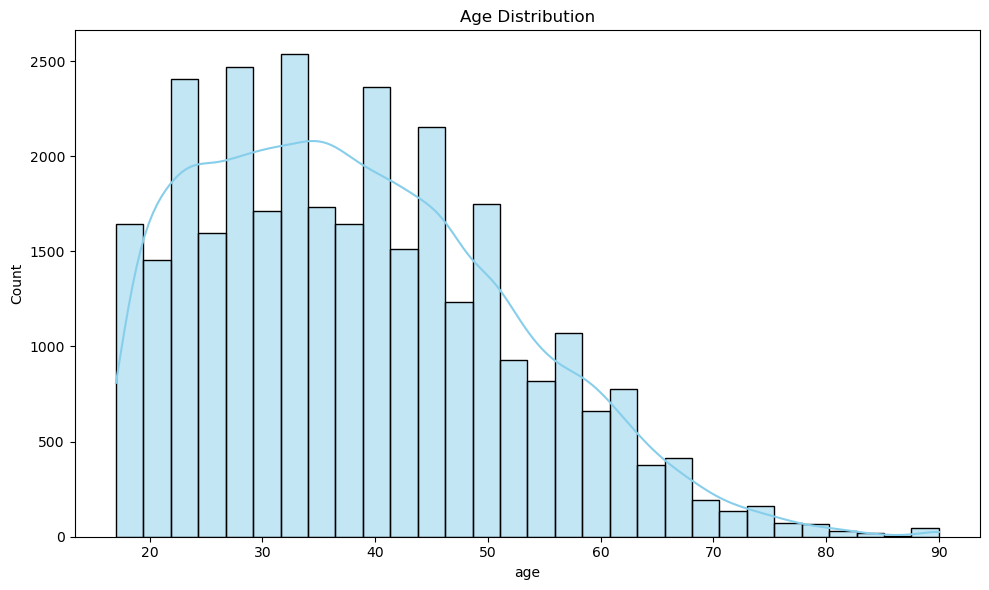

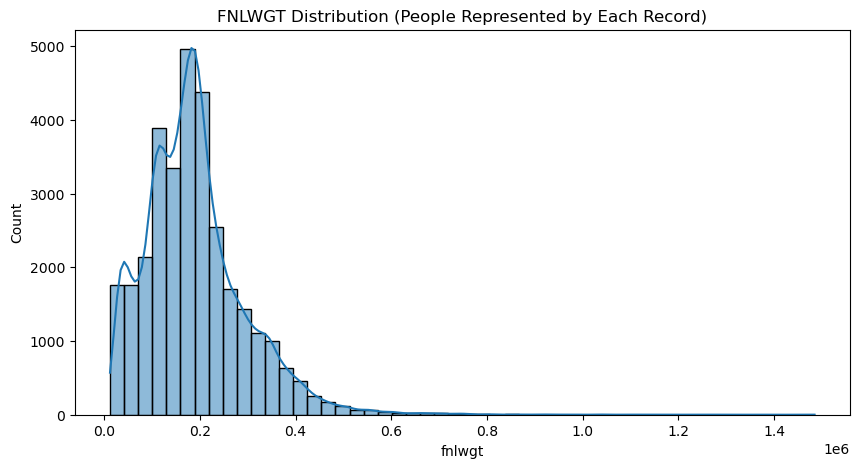

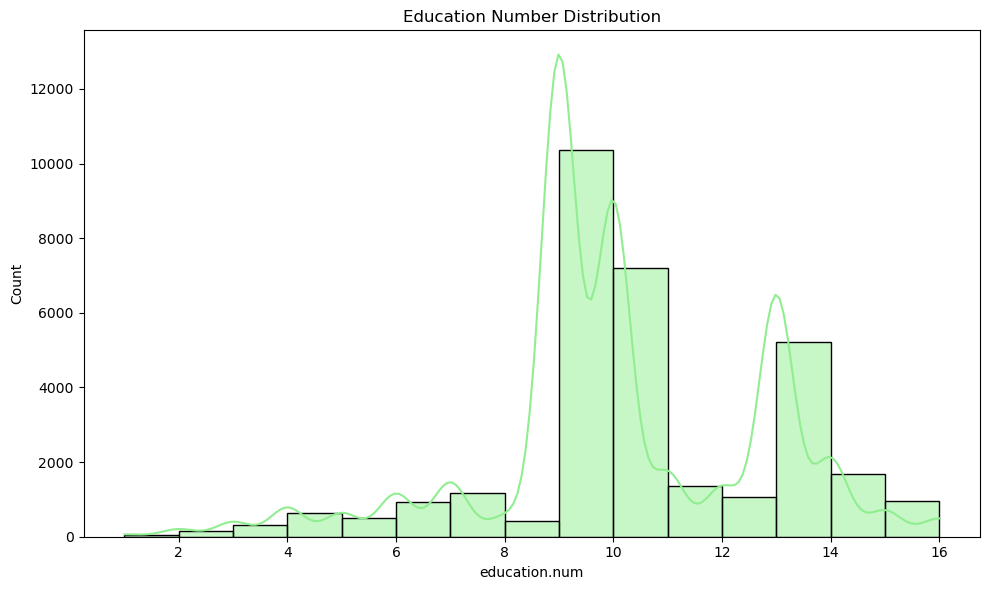

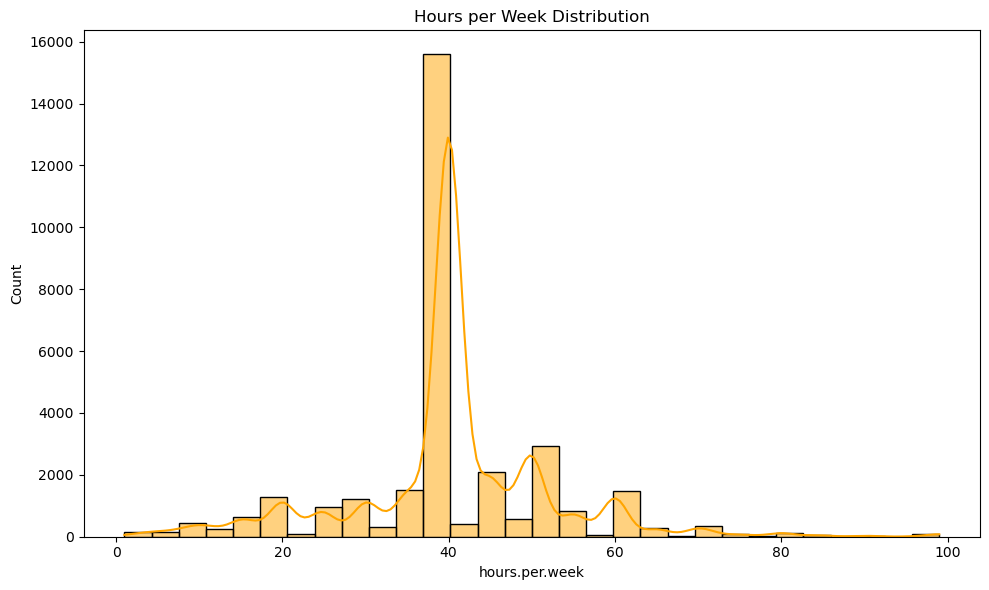

In [ ]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.tight_layout()
plt.savefig('graphs/age_distribution.png')
plt.show()


# FNWGT Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['fnlwgt'], bins=50, kde=True)
plt.title("FNLWGT Distribution (People Represented by Each Record)")
plt.savefig("graphs/fnlwgt_distribution.png")
plt.show()

# Education Number Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['education.num'], kde=True, bins=15, color='lightgreen')
plt.title('Education Number Distribution')
plt.tight_layout()
plt.savefig('graphs/education_num_distribution.png')
plt.show()

# Hours per Week Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['hours.per.week'], kde=True, bins=30, color='orange')
plt.title('Hours per Week Distribution')
plt.tight_layout()
plt.savefig('graphs/hours_per_week_distribution.png')
plt.show()

### Loss and Gain Plots

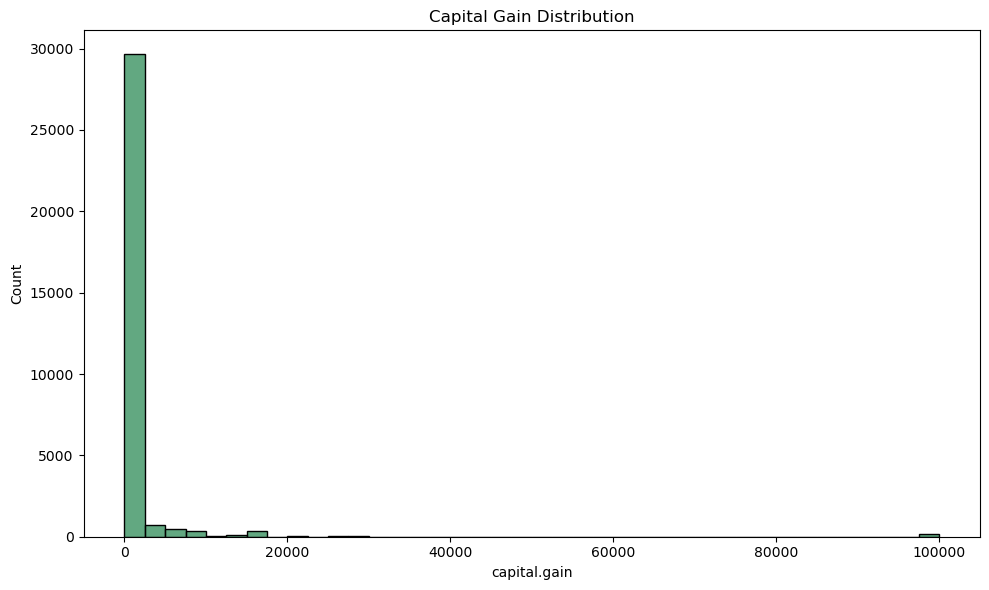

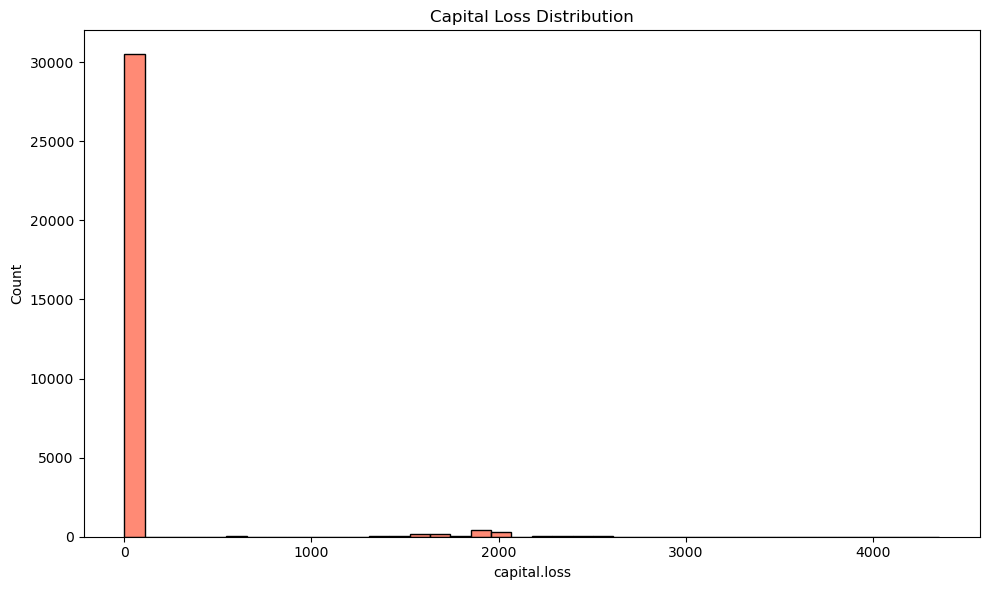

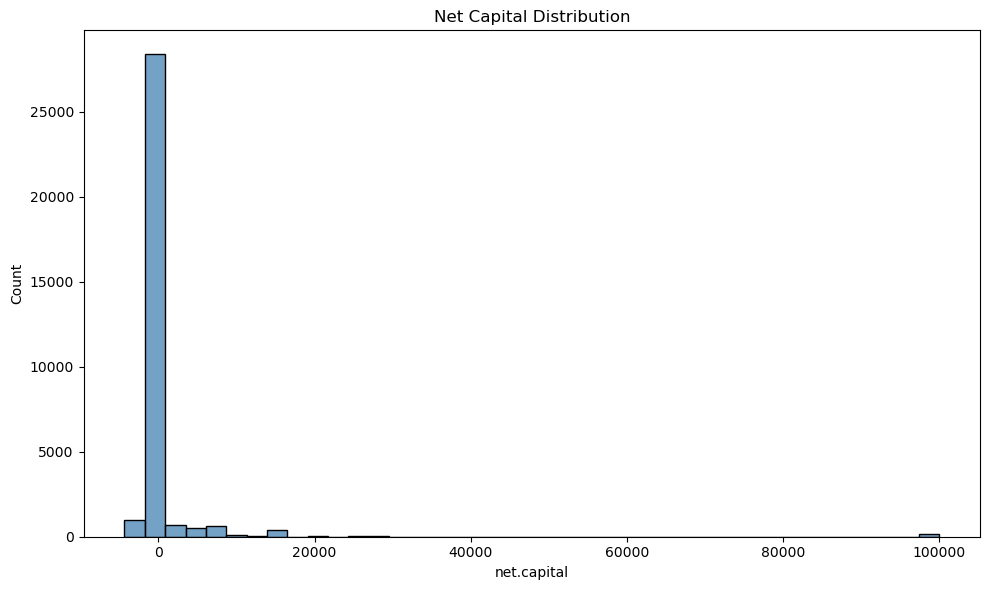

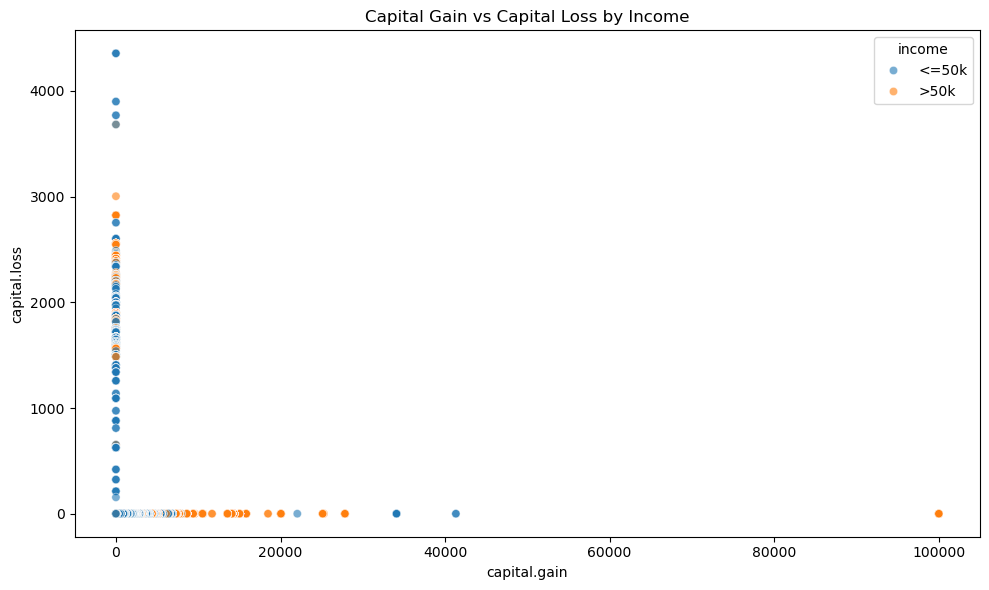

In [16]:
# Capital Gain Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['capital.gain'], bins=40, color='seagreen')
plt.title('Capital Gain Distribution')
plt.tight_layout()
plt.savefig('graphs/capital_gain_distribution.png')
plt.show()

# Capital Loss Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['capital.loss'], bins=40, color='tomato')
plt.title('Capital Loss Distribution')
plt.tight_layout()
plt.savefig('graphs/capital_loss_distribution.png')
plt.show()

# Net Capital Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['net.capital'], bins=40, color='steelblue')
plt.title('Net Capital Distribution')
plt.tight_layout()
plt.savefig('graphs/net_capital_distribution.png')
plt.show()

# Scatter plot: Capital Gain vs Capital Loss colored by Income
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='capital.gain', y='capital.loss', hue='income', alpha=0.6)
plt.title('Capital Gain vs Capital Loss by Income')
plt.tight_layout()
plt.savefig('graphs/capital_gain_vs_capital_loss.png')
plt.show()

### Correlation Matrix

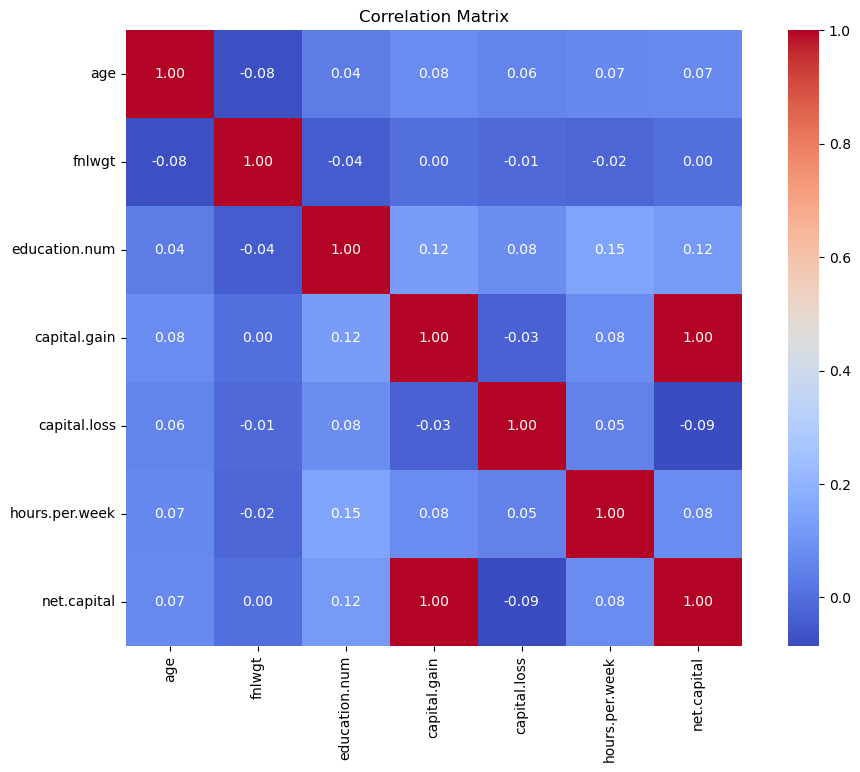

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.savefig("graphs/correlation_matrix.png")
plt.show()

### Some more Graphs

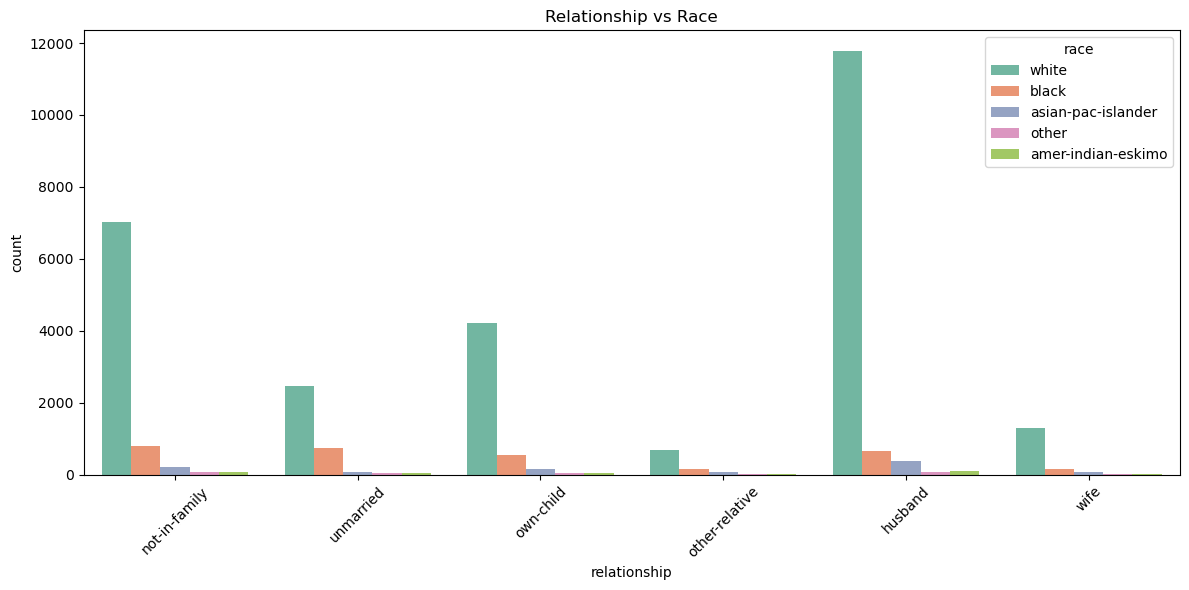

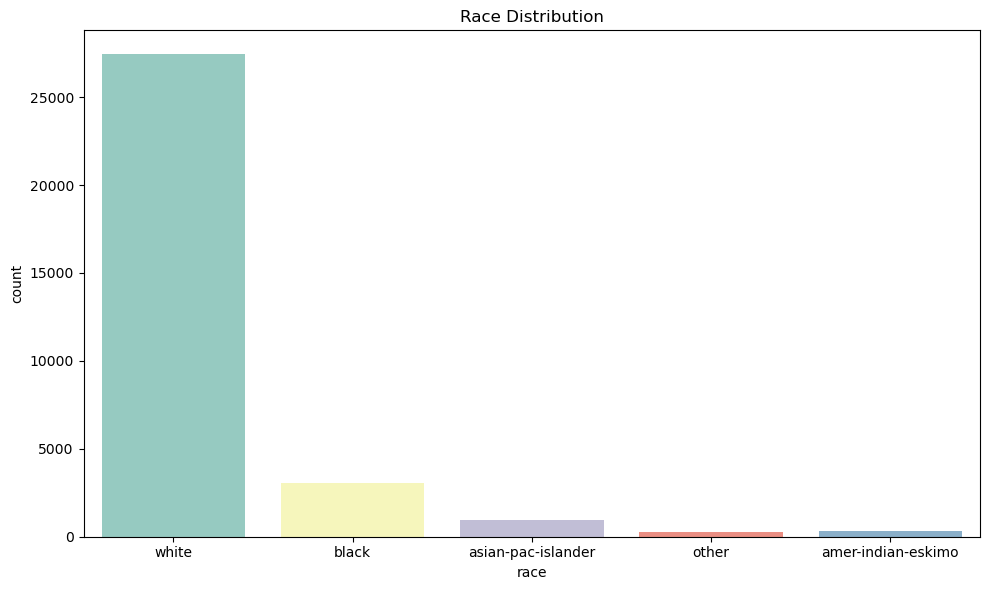

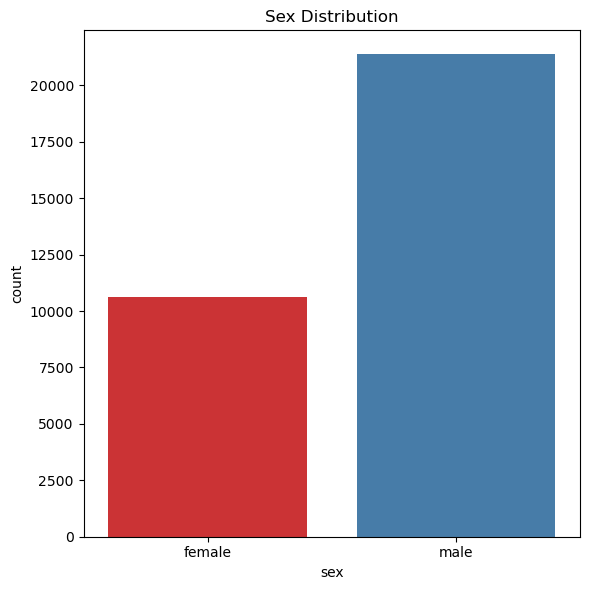

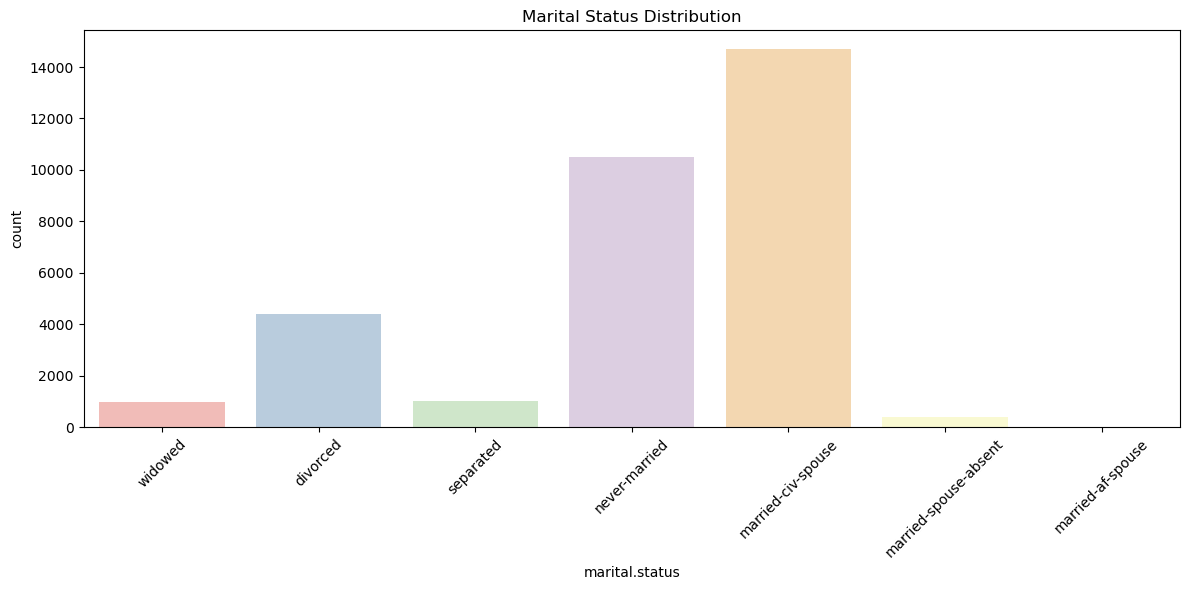

In [21]:
# Relationship vs Race
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='relationship', hue='race', palette='Set2')
plt.title('Relationship vs Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/relationship_vs_race.png')
plt.show()

# To remove future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Race Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='race', palette='Set3')
plt.title('Race Distribution')
plt.tight_layout()
plt.savefig('graphs/race_distribution.png')
plt.show()

# Sex Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='sex', palette='Set1')
plt.title('Sex Distribution')
plt.tight_layout()
plt.savefig('graphs/sex_distribution.png')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='marital.status', palette='Pastel1')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/marital_status_distribution.png')
plt.show()